In [2]:
import torch

import matplotlib.pyplot as plt

from skimage import transform
from torch.utils.data import DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [3]:
from dataset import *
from show import *

# Loading Dataset

In [4]:
dset = BuildingsDataset("data/labels")

In [5]:
idx = 0
sample = dset[idx]
img, lbl = sample['image'], sample['label']
label_names = dset.label_name_to_value

print(img.shape, img.dtype)
print(lbl.shape, lbl.dtype)
print(label_names)

(2048, 3072, 3) float32
(2048, 3072) uint8
{'_background_': 0, 'door': 1, 'object': 2, 'wall': 3, 'window': 4}


# Displaying data

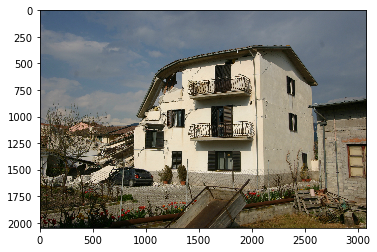

In [6]:
plt.imshow(img)
plt.show()

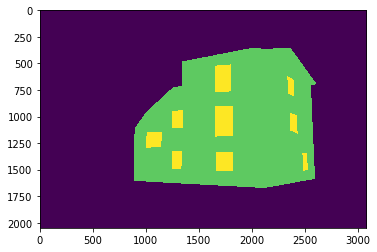

In [7]:
plt.imshow(lbl)
plt.show()

(2048, 3072, 3) (2048, 3072)


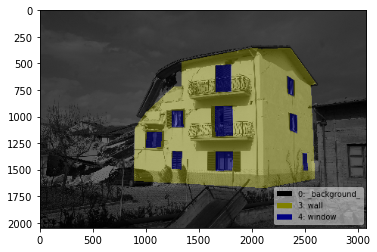

In [8]:
show_labeled_img(img, lbl, label_names)

# Going further

In [9]:
data_transform1 = transforms.Compose([
    #Rescale(1024),
    RandomCrop(512), 
    ToTensor(),
])

# not working with dict
data_transform2 = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [10]:
dset_tensor = BuildingsDataset("data/labels", transform=data_transform1)
dataloader = DataLoader(dset_tensor, batch_size=4, shuffle=True, num_workers=0)

In [18]:

def show_labeled_img(image, label, label_names):
    """Show labeled image"""
    img = (image * 255).astype('uint8')
    lbl = label.astype('uint8')
    print(img.shape, lbl.shape)
    lbl_viz = labelme.utils.draw_label(lbl, img, label_names)
    plt.imshow(lbl_viz)

# Helper function to show a batch
def show_batch(sample_batched, label_names):
    """Show labeled image for a batch of samples."""
    images_batch, labels_batch = sample_batched['image'], sample_batched['label']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    print(images_batch.shape)
    img_grid = utils.make_grid(images_batch, nrow=2)
    img_grid = img_grid.numpy().transpose((1, 2, 0))
    print(img_grid.shape)
    
    print(labels_batch.shape)
    print(labels_batch.unsqueeze(1).shape)
    lbl_grid = utils.make_grid(labels_batch.unsqueeze(1), nrow=2)
    lbl_grid = lbl_grid.numpy()[0, :, :]
    print(lbl_grid.shape)
    
    #lbl_names = sorted(list({l for group in sample_batched['label_names'] for l in group}))
    
    show_labeled_img(img_grid, lbl_grid, label_names)
    plt.title('Batch from dataloader')

0 torch.Size([4, 3, 512, 512]) torch.Size([4, 512, 512])
torch.Size([4, 3, 512, 512])
(1030, 1030, 3)
torch.Size([4, 512, 512])
torch.Size([4, 1, 512, 512])
(1030, 1030)
(1030, 1030, 3) (1030, 1030)


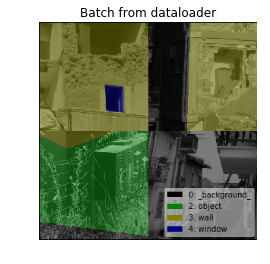

In [19]:
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(), sample_batched['label'].size())

    # observe 2 batches and stop.
    if i_batch == 0:
        plt.figure()
        show_batch(sample_batched, label_names)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break